# Standard deviations and residuals from model ensemble predictions

In this notebook we examine the distributions of the standard deviations and residuals form the model ensemble predictions on the training and test sets.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, datetime, warnings
print('Last updated on {}'.format(datetime.datetime.now().ctime()))

Last updated on Tue Jul 25 16:55:32 2023


In [2]:
# sns.set_theme(context='paper', style='ticks', palette='tab10', rc={'figure.dpi':100, 'figure.figsize':[5, 5], 'axes.grid':True})
import sns_settings
sns.set_context('paper')
pd.options.display.max_columns = 50
warnings.filterwarnings('ignore')

## Test set 

In [3]:
df_test = pd.read_csv('data/uncertainty_testset.csv', index_col=0)
# df_test = pd.read_csv('data/uncertainty_testset_noO2.csv', index_col=0)
# df_test = pd.read_csv('data/uncertainty_testset_no_sat.csv', index_col=0)
df_test.sort_values(['std_DIC','std_TA'], ascending=False)[:15]

Depth  bottom_depth  Temperature  Salinity   Oxygen  pCO2_monthave  \
612    5.000        4140.0      18.2100   35.5400  231.850         388.78   
704   39.715          45.0       7.4514   31.8268  194.807         397.32   
61    29.863          45.0       7.8352   31.7947  192.460         397.32   
4      3.000        1167.0      10.9684   34.0720  209.000         394.04   
721    9.887         180.0      11.5821   31.4888  131.246         401.46   
374   19.700        3801.0      16.3240   33.3860  264.000         382.24   
369    3.000        1049.0      14.0962   33.9062  188.000         395.36   
519   60.038         180.0       5.1237   33.2179  156.076         401.46   
879    5.000        3749.0      19.8600   36.1600  224.010         389.04   
445    4.000         779.0       6.1888   35.5330  223.000         397.55   
529  159.071         177.0       5.5587   33.4494  153.286         401.46   
746   54.900         218.0       3.7120   32.2450  201.000         399.91   
834   19.900        2486.0      16.5900   34.0330  262.600         382.24   
268    2.143         180.0      13.5326   32.1208  160.934         401.46   
113   49.700        4090.0      14.8600   34.8270  236.400         382.24   

          SLA  SST_hires  log_KD490       DIC       TA    std_DIC     std_TA  \
612 -0.131247  18.504939  -2.999498  2049.070  2347.81  15.461732  16.814753   
704  0.073731  19.374625  -1.342488  1967.370  2159.94  15.311862   8.184588   
61   0.073732  19.374063  -1.342150  1962.000  2160.87  13.506008   7.415102   
4    0.036892  11.470001  -2.880972  2067.047  2257.07  13.494190  16.356993   
721  0.053477  14.147242  -2.411693  1977.390  2139.97  13.435487  11.314918   
374 -0.108241  25.988879  -3.226565  1995.500  2242.70  13.363315  12.788612   
369  0.077624  14.468994  -2.799039  2036.400  2259.80  12.835946  19.966303   
519  0.053546  14.147454  -2.411955  2079.490  2231.98  10.474298   5.702397   
879  0.029708  19.491004  -3.052760  2088.620  2376.29   9.714704   8.437113   
445  0.079502  17.195726  -2.992096  2072.580  2347.87   9.533263   7.330954   
529  0.053604  14.147422  -2.411768  2114.290  2241.85   8.835174   4.526778   
746  0.034670   3.210655  -2.512912  2090.800  2196.25   8.744391   5.167416   
834  0.089280  25.918338  -3.125953  2015.200  2277.90   8.650249   6.546646   
268  0.053459  14.147272  -2.411684  1943.420  2179.11   8.573179   7.395991   
113 -0.242480  26.412912  -3.220219  2066.200  2317.20   8.454712   5.973140   

       avg_DIC     avg_TA  
612  2052.0576  2328.8635  
704  2043.9957  2145.5437  
61   2042.7278  2145.2126  
4    2093.0283  2256.1777  
721  1993.9990  2143.5198  
374  2012.6691  2268.2993  
369  2068.7014  2250.8460  
519  2094.8882  2217.7700  
879  2065.2950  2371.3022  
445  2178.3070  2339.7686  
529  2124.4463  2233.5444  
746  2083.9946  2175.6733  
834  2018.3333  2286.6897  
268  2003.3790  2173.2280  
113  2069.6560  2313.9673

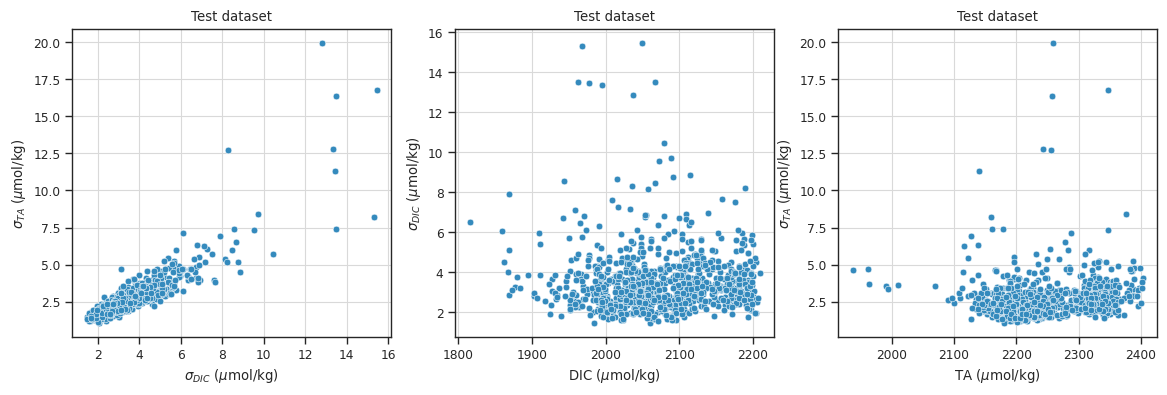

In [4]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(14, 4))
_ = sns.scatterplot(x='std_DIC', y='std_TA', data=df_test, ax=ax0)
_ = sns.scatterplot(x='DIC', y='std_DIC', data=df_test, ax=ax1)
_ = sns.scatterplot(x='TA', y='std_TA', data=df_test, ax=ax2)
_ = ax0.set(xlabel='$\sigma_{DIC}$ ($\mu$mol/kg)', ylabel='$\sigma_{TA}$ ($\mu$mol/kg)', title='Test dataset')
_ = ax1.set(xlabel='DIC ($\mu$mol/kg)', ylabel='$\sigma_{DIC}$ ($\mu$mol/kg)', title='Test dataset')
_ = ax2.set(xlabel='TA ($\mu$mol/kg)', ylabel='$\sigma_{TA}$ ($\mu$mol/kg)', title='Test dataset')

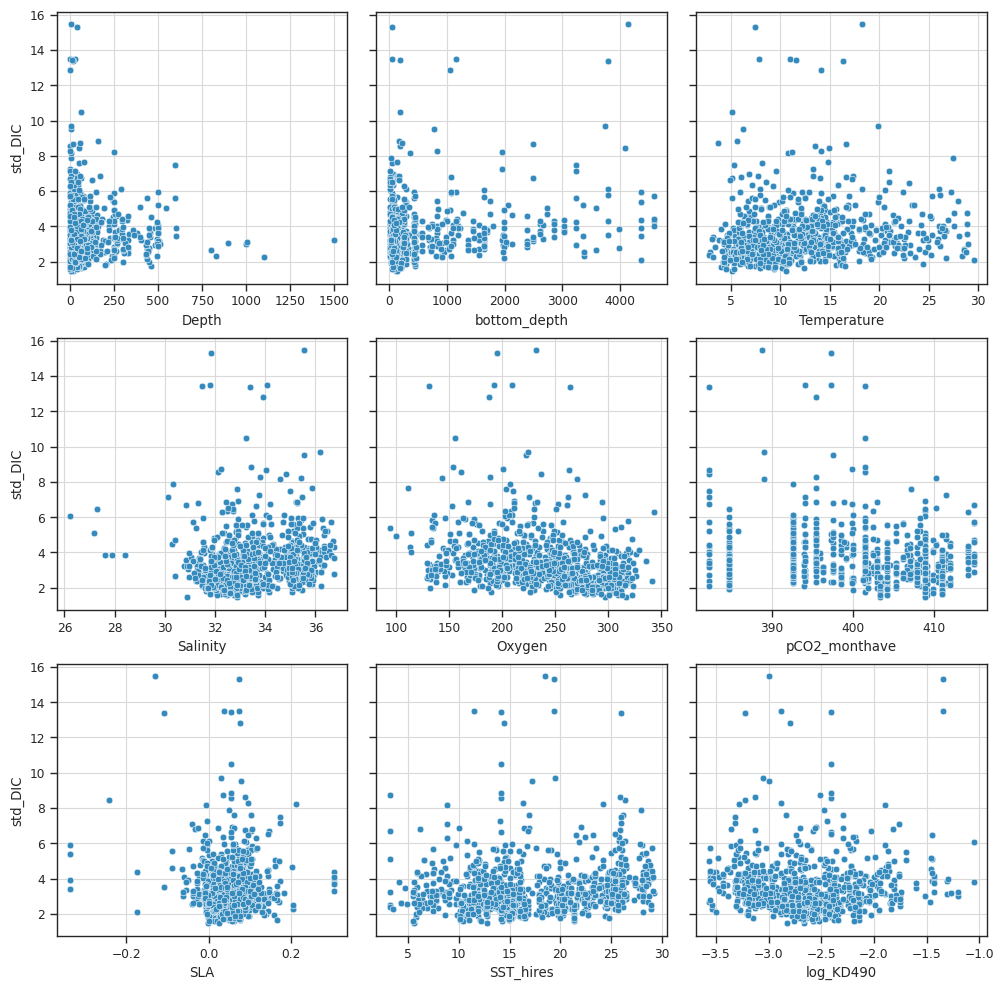

In [5]:
bot_vars = ['Depth', 'bottom_depth', 'Temperature', 'Salinity', 'Oxygen', 'pCO2_monthave', 'SLA', 'SST_hires', 'log_KD490', 'DIC', 'TA']
# bot_vars = ['Depth', 'bottom_depth', 'Temperature', 'Salinity', 'pCO2_monthave', 'SLA', 'SST_hires', 'log_KD490', 'DIC', 'TA']
# bot_vars = ['Depth', 'bottom_depth', 'Temperature', 'Salinity', 'pCO2_monthave', 'DIC', 'TA']

fig, axs = plt.subplots(3, 3, sharey=True, figsize=(12, 12))
# fig, axs = plt.subplots(2, 4, sharey=True, figsize=(16, 8))
fig.subplots_adjust(wspace=0.1)
for ax, vname in zip(axs.ravel(), bot_vars[:-2]):
    _ = sns.scatterplot(x=vname, y='std_DIC', data=df_test, ax=ax)

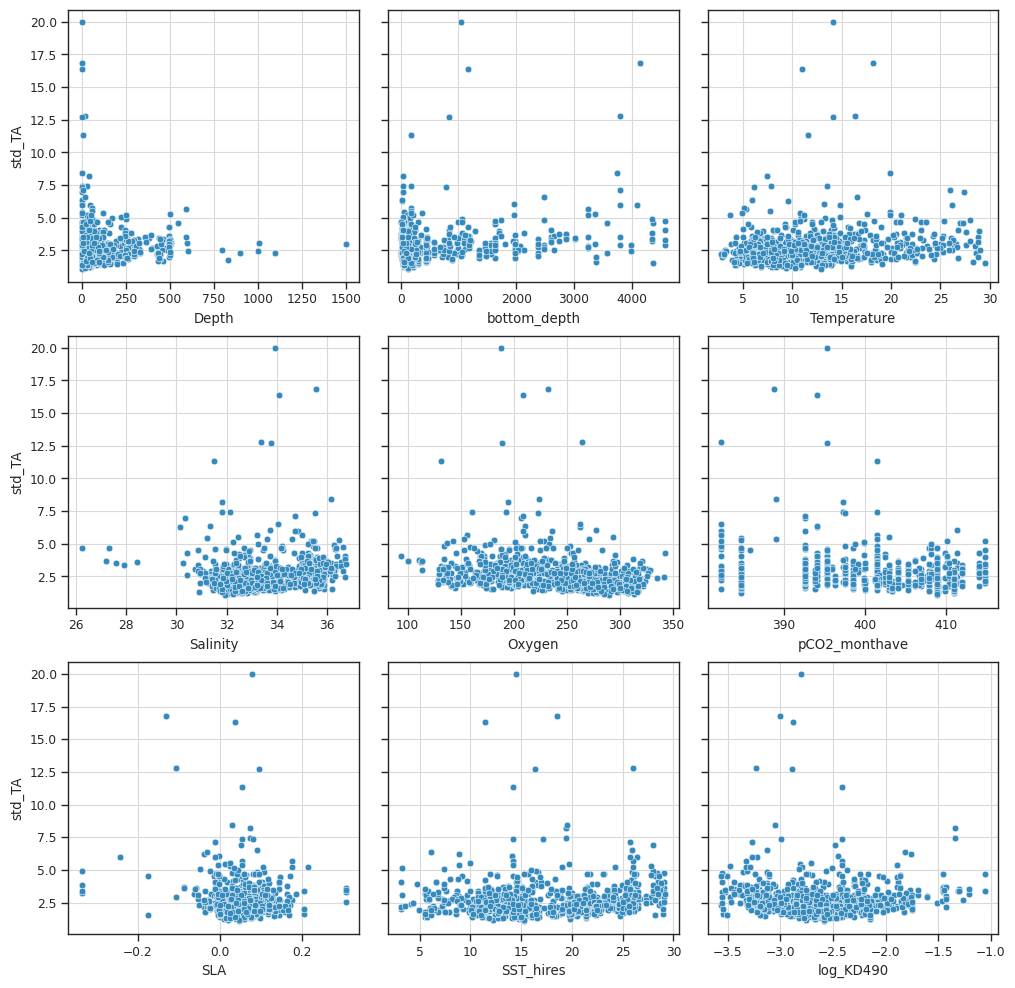

In [6]:
fig, axs = plt.subplots(3, 3, sharey=True, figsize=(12, 12))
# fig, axs = plt.subplots(2, 4, sharey=True, figsize=(16, 8))
fig.subplots_adjust(wspace=0.1)
for ax, vname in zip(axs.ravel(), bot_vars[:-2]):
    _ = sns.scatterplot(x=vname, y='std_TA', data=df_test, ax=ax)

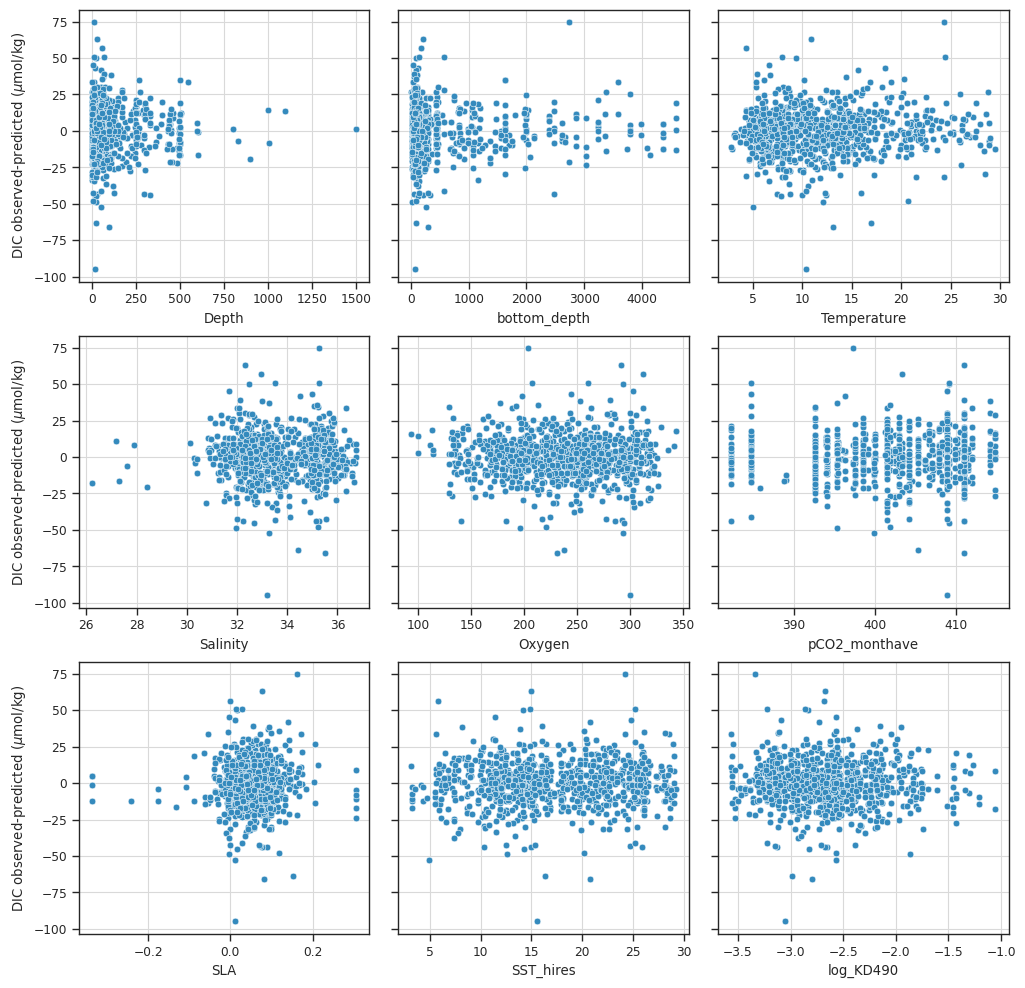

In [7]:
df_test_noO2 = pd.read_csv('data/pytorch_bottle_test_noO2.csv', index_col=0)
df_test['DIC_resid'] = df_test_noO2.DIC_test - df_test_noO2.DIC_pred_test
df_test['TA_resid'] = df_test_noO2.TA_test - df_test_noO2.TA_pred_test

fig, axs = plt.subplots(3, 3, sharey=True, figsize=(12, 12))
# fig, axs = plt.subplots(2, 4, sharey=True, figsize=(16, 8))
fig.subplots_adjust(wspace=0.1)
for ax, vname in zip(axs.ravel(), bot_vars[:-2]):
    _ = sns.scatterplot(x=vname, y='DIC_resid', data=df_test, ax=ax)
    _ = ax.set(ylabel='DIC observed-predicted ($\mu$mol/kg)')

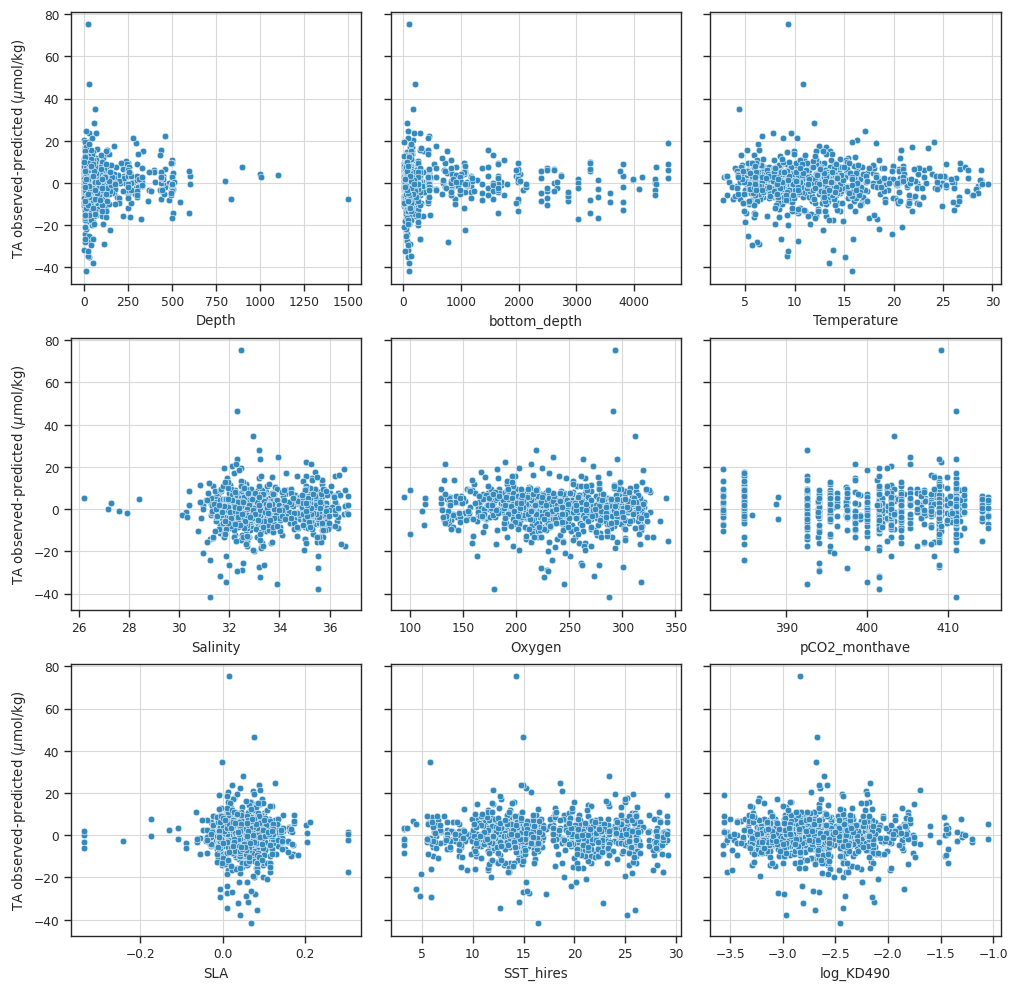

In [8]:
fig, axs = plt.subplots(3, 3, sharey=True, figsize=(12, 12))
# fig, axs = plt.subplots(2, 4, sharey=True, figsize=(16, 8))
fig.subplots_adjust(wspace=0.1)
for ax, vname in zip(axs.ravel(), bot_vars[:-2]):
    _ = sns.scatterplot(x=vname, y='TA_resid', data=df_test, ax=ax)
    _ = ax.set(ylabel='TA observed-predicted ($\mu$mol/kg)')

### Correlation table

In [9]:
vlist = ['Depth', 'bottom_depth', 'Temperature', 'Salinity', 'Oxygen', 'pCO2_monthave', 'SLA', 'SST_hires', 'log_KD490', 'DIC_resid', 'TA_resid']
df_test[vlist].corr()

Depth  bottom_depth  Temperature  Salinity    Oxygen  \
Depth          1.000000      0.310143    -0.339561  0.428842 -0.405738   
bottom_depth   0.310143      1.000000     0.316910  0.540478 -0.372120   
Temperature   -0.339561      0.316910     1.000000  0.185864 -0.255383   
Salinity       0.428842      0.540478     0.185864  1.000000 -0.613264   
Oxygen        -0.405738     -0.372120    -0.255383 -0.613264  1.000000   
pCO2_monthave -0.092945     -0.421057    -0.196663 -0.318054  0.394125   
SLA            0.061823     -0.097047     0.165478  0.076681 -0.193006   
SST_hires      0.139575      0.475310     0.549577  0.381541 -0.432458   
log_KD490     -0.303868     -0.576734    -0.218075 -0.675095  0.345901   
DIC_resid      0.009831      0.020633     0.039886 -0.006106 -0.036006   
TA_resid       0.028993      0.003754    -0.007071  0.018371 -0.043695   

               pCO2_monthave       SLA  SST_hires  log_KD490  DIC_resid  \
Depth              -0.092945  0.061823   0.139575  -0.303868   0.009831   
bottom_depth       -0.421057 -0.097047   0.475310  -0.576734   0.020633   
Temperature        -0.196663  0.165478   0.549577  -0.218075   0.039886   
Salinity           -0.318054  0.076681   0.381541  -0.675095  -0.006106   
Oxygen              0.394125 -0.193006  -0.432458   0.345901  -0.036006   
pCO2_monthave       1.000000  0.087870  -0.411200   0.341951   0.014472   
SLA                 0.087870  1.000000   0.225700  -0.056685   0.032092   
SST_hires          -0.411200  0.225700   1.000000  -0.534052   0.035831   
log_KD490           0.341951 -0.056685  -0.534052   1.000000  -0.011965   
DIC_resid           0.014472  0.032092   0.035831  -0.011965   1.000000   
TA_resid            0.019849 -0.000061   0.029131  -0.021301   0.196447   

               TA_resid  
Depth          0.028993  
bottom_depth   0.003754  
Temperature   -0.007071  
Salinity       0.018371  
Oxygen        -0.043695  
pCO2_monthave  0.019849  
SLA           -0.000061  
SST_hires      0.029131  
log_KD490     -0.021301  
DIC_resid      0.196447  
TA_resid       1.000000

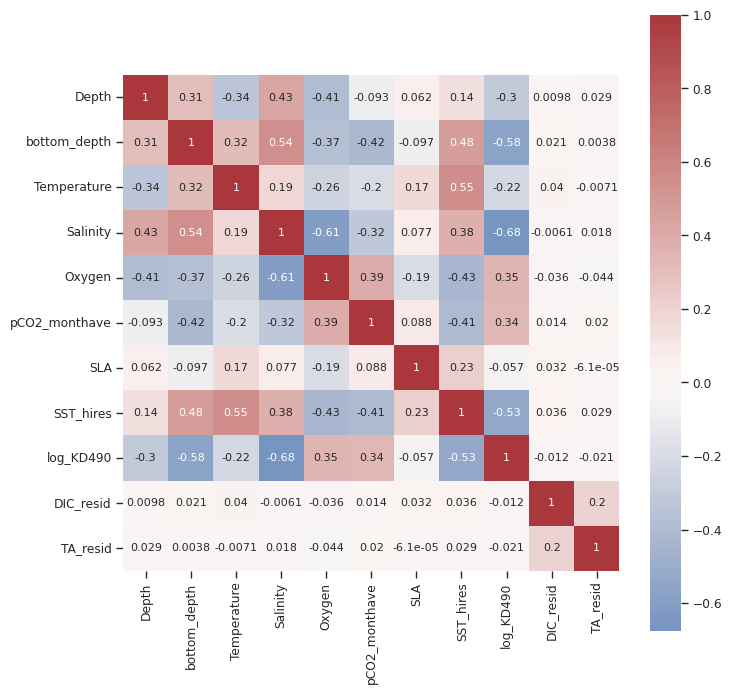

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.heatmap(df_test[vlist].corr(), ax=ax, cmap='vlag', center=0, square=True, annot=True, annot_kws={'fontsize':8})

#### Absolute value of residuals 

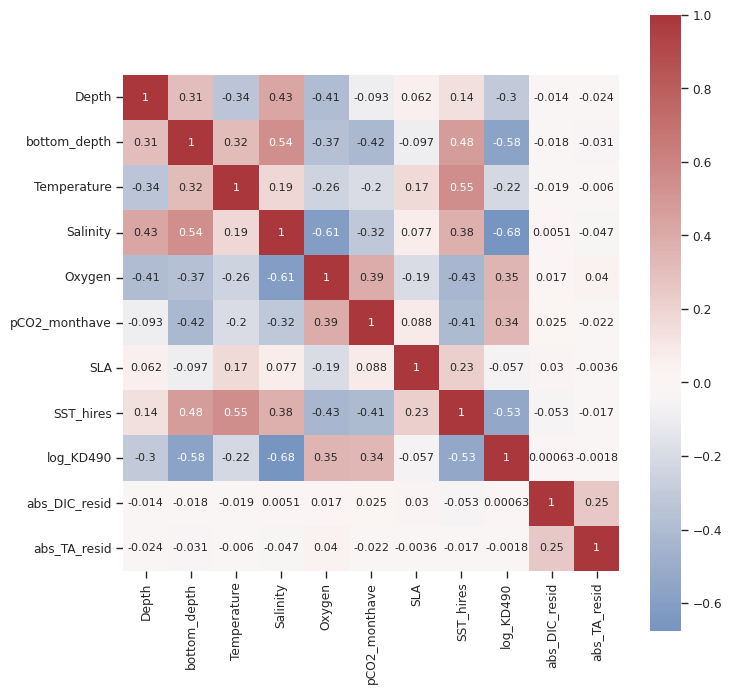

In [11]:
df_test['abs_DIC_resid'] = np.abs(df_test.DIC_resid)
df_test['abs_TA_resid'] = np.abs(df_test.TA_resid)
vlist2 = ['Depth', 'bottom_depth', 'Temperature', 'Salinity', 'Oxygen', 'pCO2_monthave', 'SLA', 'SST_hires', 'log_KD490',
         'abs_DIC_resid', 'abs_TA_resid']
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.heatmap(df_test[vlist2].corr(), ax=ax, cmap='vlag', center=0, square=True, annot=True, annot_kws={'fontsize':8})

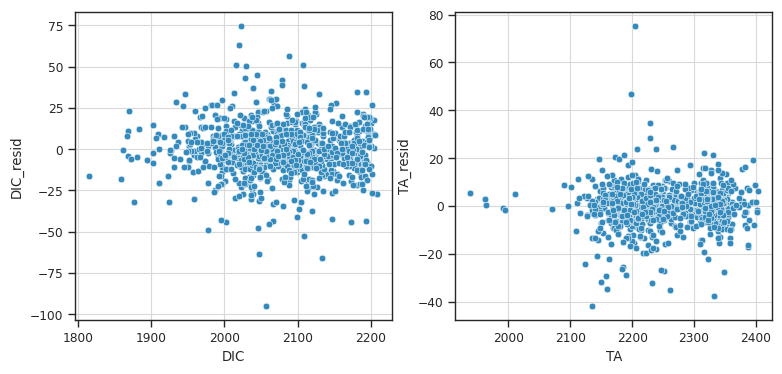

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
_ = sns.scatterplot(x='DIC', y='DIC_resid', data=df_test, ax=axs[0])
_ = sns.scatterplot(x='TA', y='TA_resid', data=df_test, ax=axs[1])

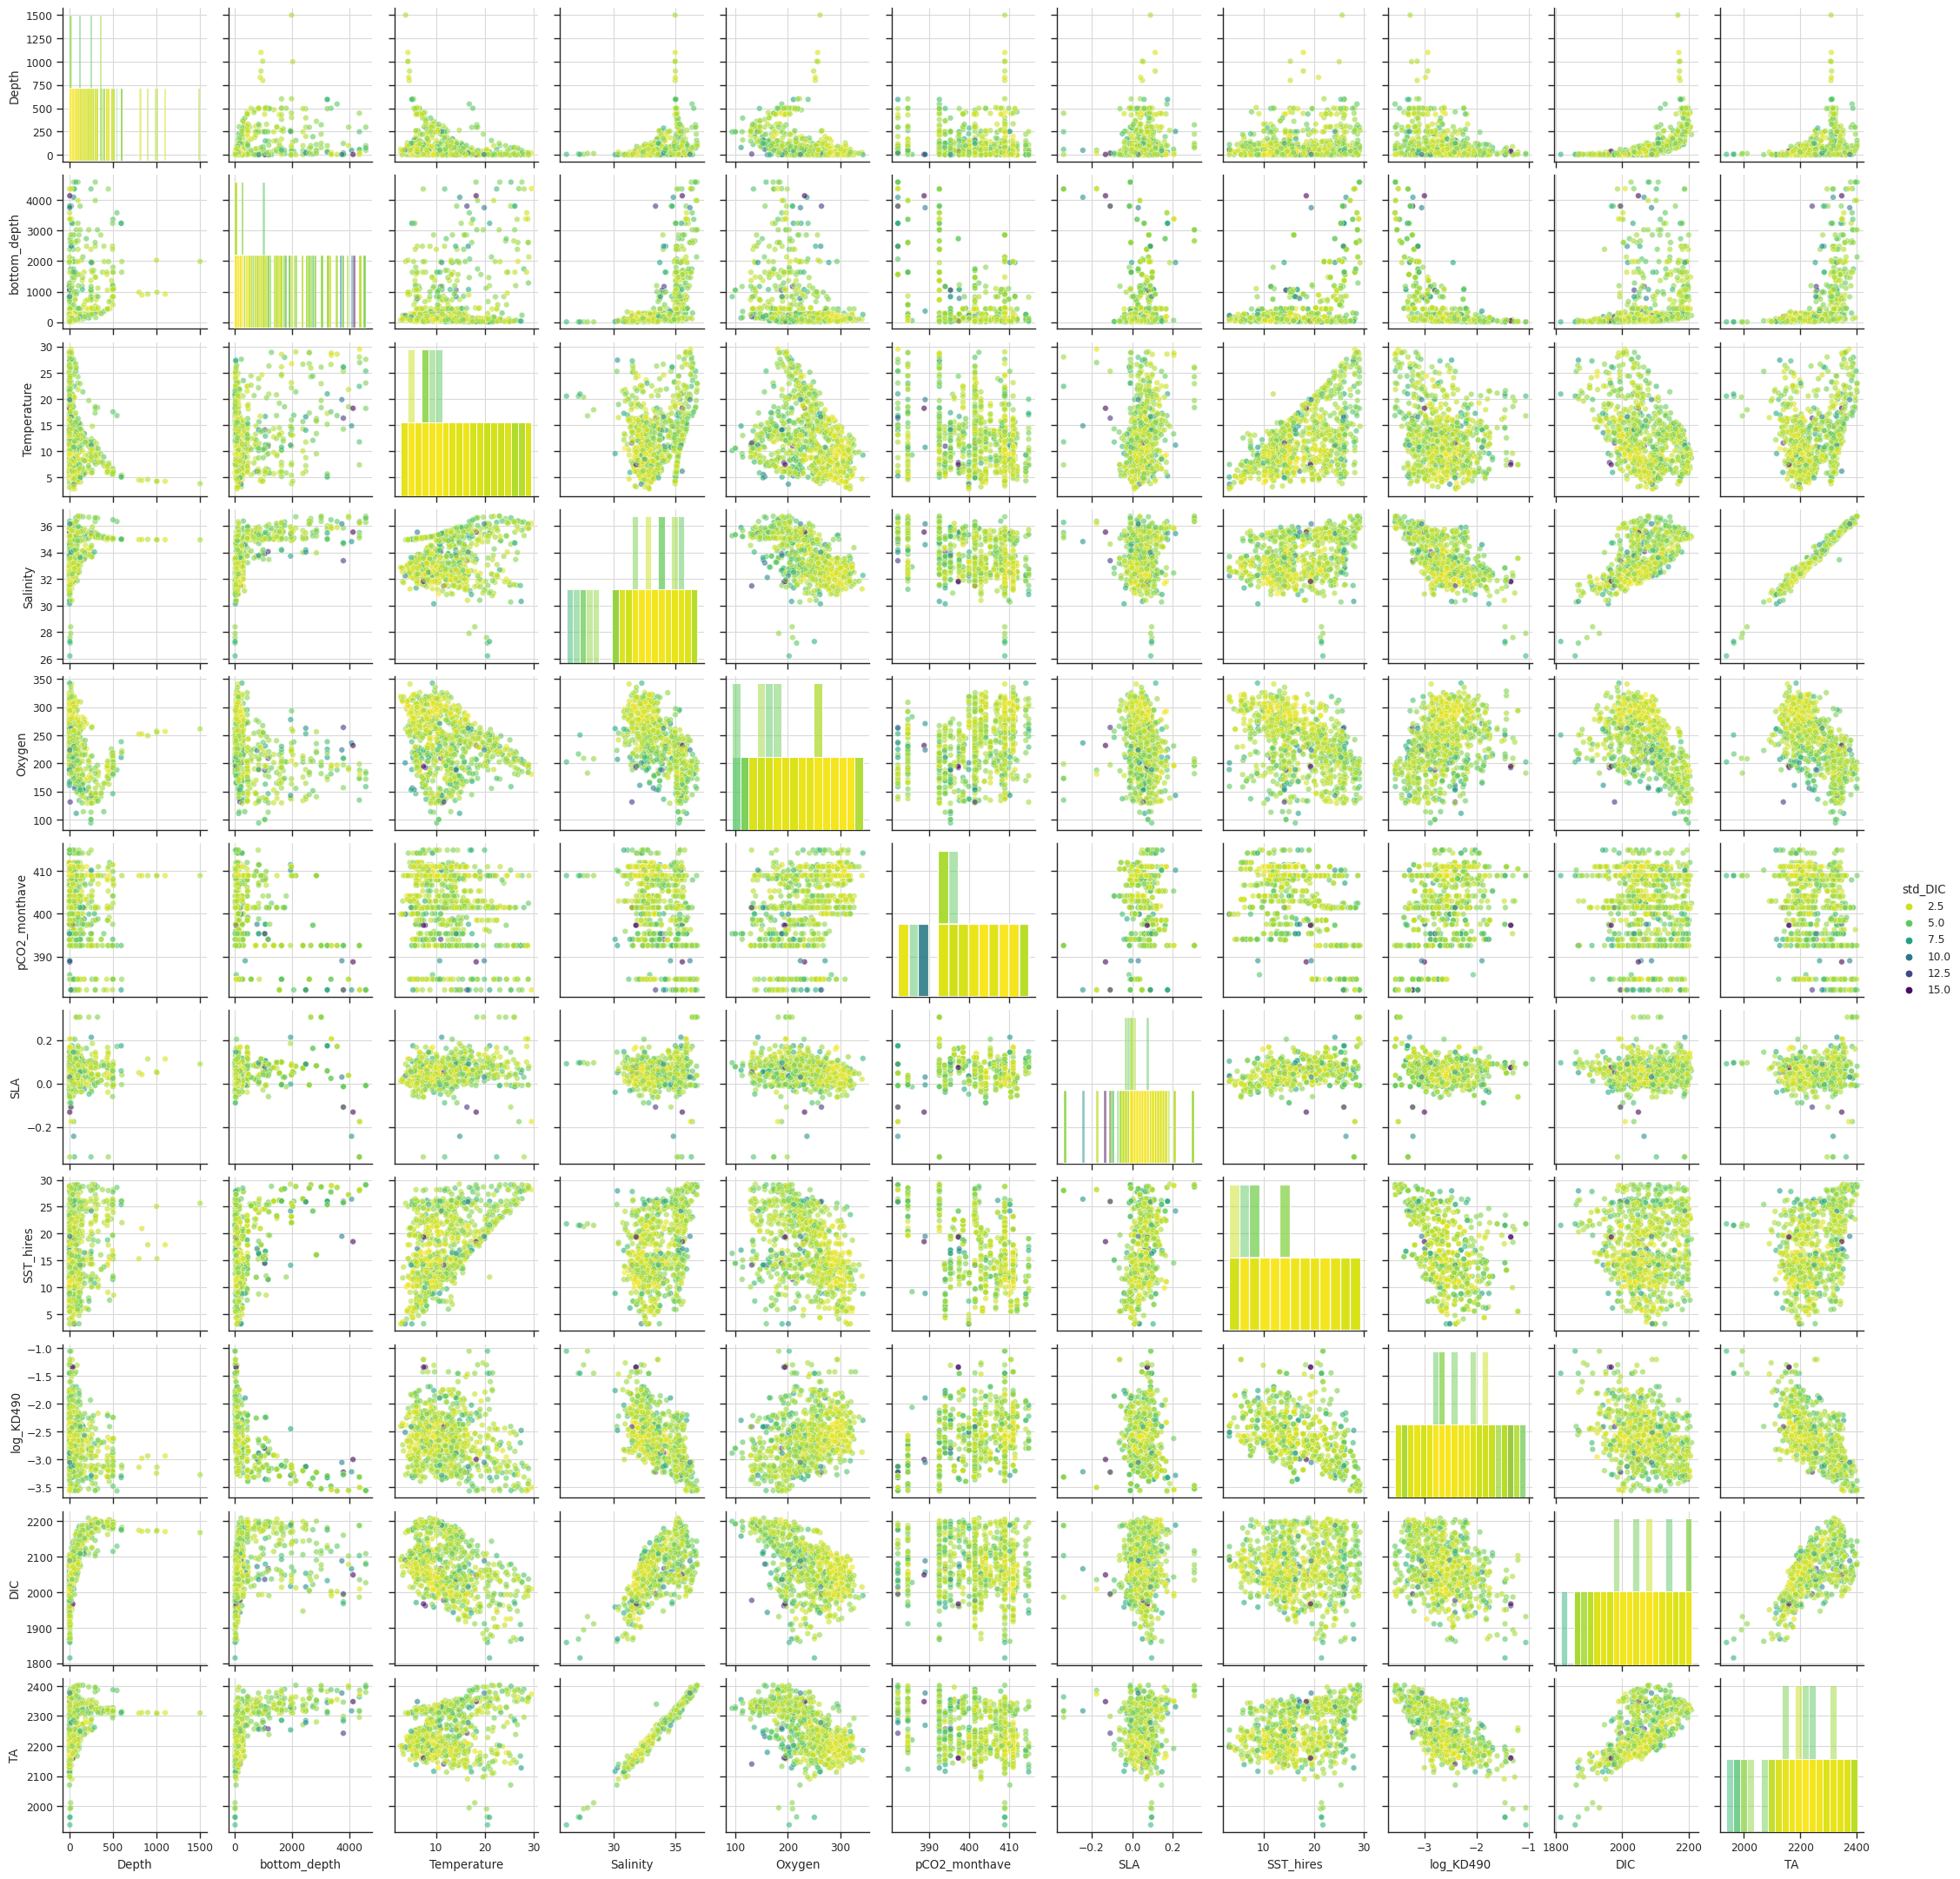

In [13]:
fg = sns.pairplot(df_test, vars=bot_vars, hue='std_DIC', palette='viridis_r', height=2, plot_kws={'alpha':0.6}, diag_kind='hist')

In [14]:
# df_bottle = pd.read_csv('data/bottle_satellite_data_clean.csv', parse_dates=['Date'], index_col=0)
# # df_bottle.loc[1736:1737]

# cols = ['EXPOCODE', 'Accession', 'Cruise_ID', 'Date', 'Time_UTC', 'Latitude', 'Longitude', 'Depth', 'Salinity', 'Temperature',
#        'Oxygen', 'DIC', 'TA', 'pCO2_monthave', 'bottom_depth', 'SLA', 'SST', 'SST_hires', 'Chl', 'KD490', 'log_Chl', 'log_KD490']
# df_cruise = df_bottle[df_bottle.Cruise_ID=='PC1405']
# df_cruise = df_cruise.sort_values(['Date', 'Latitude', 'Longitude', 'Depth'])
# df_cruise = df_cruise[cols]
# df_cruise

## Training set 

In [15]:
df_train = pd.read_csv('data/uncertainty_trainset.csv', index_col=0)
df_train.sort_values(['std_DIC','std_TA'], ascending=False)[:15]

Depth  bottom_depth  Temperature  Salinity   Oxygen  pCO2_monthave  \
1754   19.970    180.000000       8.4828  32.35180  127.976         401.46   
755    45.545     45.000000       7.4258  31.82640  194.194         397.32   
2512   29.997    180.000000       6.9241  32.79520  138.686         401.46   
718    39.467    180.000000       5.5663  33.11500  146.348         401.46   
838    39.467    180.000000       5.5663  33.11500  146.348         401.46   
831   178.645    177.000000       5.5990  33.35380  157.106         401.46   
1460    2.000    144.000000       6.9610  33.62300   72.000         399.91   
1923  103.000    195.331695       6.0841  33.11295  116.828         408.90   
665     2.700   1954.000000       7.4960  33.78800  206.000         399.91   
324   129.989    190.470497       8.0817  33.89495  166.020         410.99   
22      2.000    257.000000      11.6630  32.36000  152.000         409.08   
1267    2.000    245.000000       9.9740  31.71000  165.000         409.08   
958    59.903    134.519669       2.5201  32.11540  159.388         408.90   
1788  147.088    177.000000       5.2978  33.57170  139.173         401.46   
2116    1.000    221.000000       7.7250  31.22000  172.000         409.08   

           SLA  SST_hires  log_KD490      DIC           TA    std_DIC  \
1754  0.053493  14.147243  -2.411716  1985.85  2193.410000  17.529045   
755   0.073730  19.375712  -1.343216  1966.80  2162.580000  16.312918   
2512  0.053509  14.147299  -2.411790  2042.53  2213.960000  15.065510   
718   0.053530  14.147378  -2.411878  2071.05  2227.590000  11.417484   
838   0.053530  14.147378  -2.411878  2071.78  2227.590000  11.417484   
831   0.053612  14.147381  -2.411693  2121.77  2237.770000  10.068955   
1460 -0.048633   7.430237  -2.821628  2095.00  2245.380000   9.929363   
1923  0.039872  17.730333  -2.859086  2111.62  2229.395658   9.233136   
665  -0.013729   5.724996  -2.699395  2108.90  2253.460000   9.143751   
324   0.088064  14.755235  -2.579512  2132.54  2265.755738   8.045593   
22    0.070883  11.696249  -2.764542  2004.22  2192.730000   7.915025   
1267  0.066665   9.637002  -2.450998  1989.37  2155.240000   7.759745   
958   0.024819  12.733865  -2.823357  2099.56  2188.743475   7.704674   
1788  0.053601  14.147476  -2.411853  2108.88  2247.060000   7.671287   
2116  0.034205   9.347436  -2.674205  2016.56  2143.070000   7.647824   

        std_TA    avg_DIC     avg_TA  
1754  8.306252  2025.3871  2172.1392  
755   8.818401  2043.7273  2145.0007  
2512  6.457157  2054.8284  2195.0286  
718   6.462987  2081.9922  2211.8552  
838   6.462987  2081.9922  2211.8552  
831   6.107285  2123.2512  2229.1143  
1460  7.921454  2102.2817  2246.5840  
1923  5.210979  2114.4707  2230.6768  
665   4.160964  2116.3625  2250.5605  
324   4.205530  2147.2373  2262.2542  
22    7.298359  2018.8760  2183.0579  
1267  5.906830  2003.7345  2153.1130  
958   5.644191  2096.0444  2191.4841  
1788  4.716155  2130.4170  2240.0890  
2116  6.322464  2008.9055  2142.7430

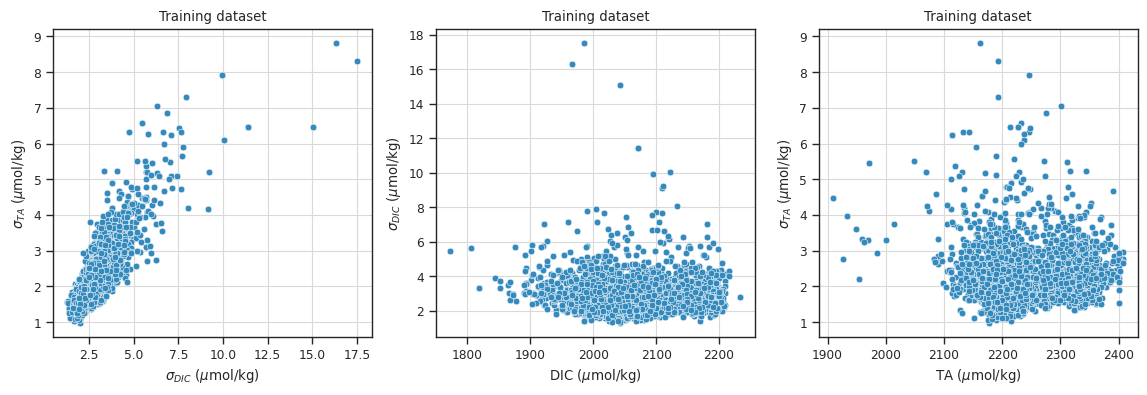

In [16]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(14, 4))
_ = sns.scatterplot(x='std_DIC', y='std_TA', data=df_train, ax=ax0)
_ = sns.scatterplot(x='DIC', y='std_DIC', data=df_train, ax=ax1)
_ = sns.scatterplot(x='TA', y='std_TA', data=df_train, ax=ax2)
_ = ax0.set(xlabel='$\sigma_{DIC}$ ($\mu$mol/kg)', ylabel='$\sigma_{TA}$ ($\mu$mol/kg)', title='Training dataset')
_ = ax1.set(xlabel='DIC ($\mu$mol/kg)', ylabel='$\sigma_{DIC}$ ($\mu$mol/kg)', title='Training dataset')
_ = ax2.set(xlabel='TA ($\mu$mol/kg)', ylabel='$\sigma_{TA}$ ($\mu$mol/kg)', title='Training dataset')

In [17]:
# df_test.head()

In [18]:
# df_test_noO2 = pd.read_csv('data/pytorch_bottle_test_noO2.csv', index_col=0)
# df_test_noO2.head()

# n = 1
# fig, axs = plt.subplots(1, 2, figsize=(11, 5))
# _ = axs[0].errorbar(df_test_noO2.DIC_test[::n], df_test_noO2.DIC_pred_test[::n], yerr=df_test.std_DIC[::n]*1.96, fmt='.', alpha=0.5)
# _ = axs[1].errorbar(df_test_noO2.TA_test[::n], df_test_noO2.TA_pred_test[::n], yerr=df_test.std_TA[::n]*1.96, fmt='.', alpha=0.5)
# _ = axs[0].set(title='Test set', xlabel='Observed DIC', ylabel='Predicted DIC')
# _ = axs[1].set(title='Test set', xlabel='Observed TA', ylabel='Predicted TA')
# # fig.savefig('test.png', dpi=300, bbox_inches='tight')

In [19]:
# g = sns.displot(df, x='std', hue='variable', ax=ax)
# _ = g.ax.set(xlabel='standard deviation')
# g.fig.savefig('test.png', dpi=300, bbox_inches='tight')